# Yerel Sertlik Matrisi ve Yerel Kuvvet Vektörünün Oluşturulması
4.c bölümünde Galerkin metodu ile zayıf formun yaklaşık çözümünü anlatmış, 4.d bölümünde ise test ve deneme fonksiyonları için kullanabileceğimiz baz fonksiyonlarını tanıtmıştık. 4.d'de de bahsettiğimiz üzere sonlu elemanlar yöntemini kullanırken problem geometrisini  ufak parçalara bölüyorduk ve bu ufak parçaları ağ olarak adlandırıyorduk. Bu adımda ufak parçalar ile problemin bütünü arasındaki ilişkiyi inceleyecek, sertlik martisi ve kuvvet vektörünü nasıl oluşturabileceğimizi uygulamalı olarak göreceğiz. 

4.c bölümünde elde ettiğimiz son integral aşağdaki gibiydi:

$$ \sum_{j=1}^n c_{j}\left(\int_{0}^{l}N_{j}(x)b\,dx\ \right) = \sum_{j=1}^n c_{j}\left(\sum_{i=1}^n\left(\int_{0}^{l} \frac{dN_{j}}{dx}AE u_{i}\frac{dN_{i}}{dx} \,dx\right)\right). \tag{1} $$

Burada görüldüğü üzere belirli integralin sınırları 0 ile l arasındadır, yani 1 boyutlu problemin problemin bir sınırından diğer sınırınadır. Hatırlanacağı üzere 4.d bölümünde tanıttığımız baz fonksiyonları küçük bir aralık hariç 0 değerini alıyordu. Denklem (1)'de baz fonksiyonları çarpım halindedir. Bu da bize iki fonksiyondan en az birinin sıfır olduğu aralıklarda integralin sıfır değeri vereceğini gösterir. Bunu grafiksel olarak görebilmek için 0 ile 1 arasında bir problememiz olduğunu düşünelim. Problem geometrimizi (burada 0 ile 1 arasında basit bir çizgi) 5 eşit parçaya bölelim. Geçen bölümde tanıttığımız baz fonksiyonlarını bu oluşturduğumuz ağ için çizdirelim.

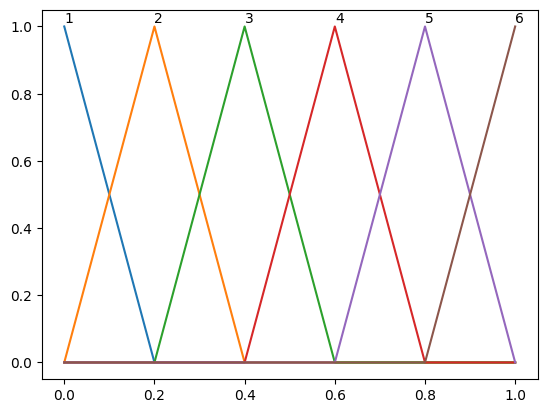

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TekBoyutluMesh:
    def __init__(self, uzunluk, eleman_sayısı):
        self.L = uzunluk
        self.ES = eleman_sayısı
        self.NS = eleman_sayısı+1 # nokta sayısı
        self.h = uzunluk/eleman_sayısı # eleman uzunluğu
        self.koordinatlar = np.linspace(0,uzunluk,self.NS)

uzunluk = 1
eleman_sayısı = 5
mesh = TekBoyutluMesh(uzunluk, eleman_sayısı)

def v(mesh, nokta):
    # Bu fonksiyonu cizdirebilmek icin baz fonksiyonlarına ait yeni mesh kullanalim:
    baz_mesh = TekBoyutluMesh(mesh.L, mesh.NS*100)
    
    v_dizi = np.zeros(baz_mesh.NS)
    for nokta_indisi, baz_nokta in enumerate(baz_mesh.koordinatlar):

        if  baz_nokta >= mesh.koordinatlar[nokta-1] and baz_nokta <= mesh.koordinatlar[nokta]:
            v_dizi[nokta_indisi] = (baz_nokta-mesh.koordinatlar[nokta-1])/(mesh.h)

        elif  baz_nokta >= mesh.koordinatlar[nokta] and baz_nokta <= mesh.koordinatlar[nokta+1]: 
            v_dizi[nokta_indisi] = ((mesh.koordinatlar[nokta+1])-baz_nokta)/(mesh.h)

        else:
            v_dizi[nokta_indisi] = 0
        
    return v_dizi, baz_mesh

for nokta in range(mesh.NS):
    baz_fonksiyonu, baz_mesh = v(mesh, nokta)
    plt.plot(baz_mesh.koordinatlar, baz_fonksiyonu)
    plt.text(mesh.koordinatlar[nokta],1.01,str(nokta+1))

Yukarıda 6 adet baz fonksiyonu vardır. Örneğin 3 ve 4 numaralı baz fonksiyonlarını dikkate alırsak (yeşil ve kırmızı renkli çizgiler), bu fonksiyonların 0.4 ile 0.6 arası hariç çarpımlarının 0 olduğunu kolaylıkla görürüz. Yani bu iki fonksiyonun çarpımları 5 parçadan sadece 1'inde sıfırdan farklı değer alır ve integralde hesaplanır. 4.c bölümünden hatırlanacağı üzere Galerkin yönteminde hem test hem deneme fonksisyonları için aynı baz fonksiyonlarını kullanıyoruz. O yüzden herhangi bir baz fonksiyonun kendisi ile çarpımı da mümkündür. 3. baz fonksiyonunun kendisi ile çarpımını ele alırsak 0.2-0.4 ve 0.4-0.6 arası çarpımın sıfır olmadığını ve integralin hesaplandığını görürüz. 4. baz fonlsiyonu için de 0.4-0.6 ve 0.6-0.8 arası çarpım sıfırdan farklıdır. Eğer 0.4-0.6 arasında bulunan parçaya odaklanırsak, burada integrale sadece 3. ve 4. baz fonksiyonlarının çarpımlarının kombinasyonlarının katkı sağladığını görürüz. 

Şimdi bu anlattıklarımızın denklem (1)'deki karşılığını düşünelim. Denklem (1)'i bu ağ ile kullanacak olursak $n$=6 değerini alır. Eğer $j=3$ ise $i$'nin alabileceği 6 değer vardır. Ancak yukarıdaki görselden görüleceği üzere 3 numaralı baz fonksiyonu ile çarpımı sıfır olmayan baz fonksiyonları 2,3 ve 4'tür. Eğer yine 0.4-0.6 arasında bulunan parçaya odaklanırsak, $j=3$ olduğunda $i$'nin 3 ve 4 olduğu durumlar bu parçaya katkıda bulunur. Ayrıca $j=4$ olduğunda da $i=3$ ve $i=4$ durumu  0.4-0.6 parçasına katkıda bulunur. Yani daha önce yukarıdaki görselden hareketle vardığımız sonuca denklem (1) üzerinden de varmış oluruz. 0.4-0.6 arasındaki parçaya 3. ve 4. baz fonksiyonlarının çarpımlarının kombinasyonları katkı sağlar (($j=3$,  $i=3$), ($j=3$,  $i=4$), ($j=4$,  $i=3$), ($j=4$, $i=4$)). 

Baz fonksiyonlarının sadece belirli parçalarda katkı sağlamasından dolayı sonlu elemanlar yöntemini kullanırken sıklıkla işlemler yerel elemanlara özel olarak yapılır. Yani oluşturduğumuz ağda her bir parça tek tek ele alınır ve integraller bu parçalar üzerinde hesaplanır. O yüzden buradan elde ettiğimiz sertlik matrislerine ve kuvvet vektörlerine yerel sertlik matrisi ve yerel kuvvet vektörü deriz. Yerel işlemlerden globale, yani probleminin bütününe geçiş ise bu yerel matrisleri birleştirek sağlanır. 

Şimdi bunu bir örnek üzerinden anlatmaya çalışalım. Yine 0.4-0.6 aralığındaki parçayı ele alacak olursak, burada 3. baz fonksiyonunun sağ kısmı (0.4-0.6 arası negatif eğimli bir eğri), 4. baz fonksiyonunun ise sol kısmı (0.4-0.6 arası pozitif eğimli bir eğri) yer alır. Bu iki parçayı basitçe aşağıdaki gibi çizdirebiliriz.

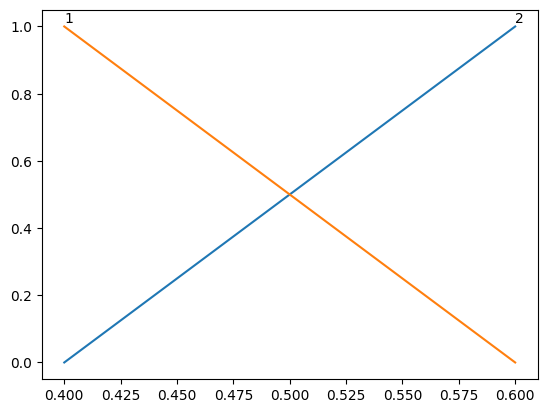

In [2]:
sekil=[[0,1],[1,0]]
for i in range(2,4):
    plt.plot(mesh.koordinatlar[2:4],sekil[i-2])
    plt.text(mesh.koordinatlar[i],1.01,str(i-1))

 Buradaki 1 ve 2 rakamları, 1. ve 2. lokal baz fonksiyonunu (diğer bir ifade ile şekil fonksiyonunu) ifade eder. Bu iki şekil fonksiyonu toplamda 4 kombinasyon oluşturur. Bunu denklem olarak yazmak istediğimizde denklem (1)'de $n$ sayısını ve integral sınırlarını değiştirmemiz yeterli olur. Burada $n=2$ ve integral sınırları 0.4-0.6'dır. Bunu herhangi bir parça için yazmak istersek ve parçanın başlangıç koordinatına $x_a$, bitiş koordinatına $x_b$ dersek, denklemimiz aşağıdaki şeklini alır:

 $$ \sum_{j=1}^2 c_{j}\left(\int_{x_a}^{x_b}N_{j}(x)b\,dx\ \right) = \sum_{j=1}^2 c_{j}\left(\sum_{i=1}^2\left(\int_{x_a}^{x_b} \frac{dN_{j}}{dx}AE u_{i}\frac{dN_{i}}{dx} \,dx\right)\right). \tag{2} $$

Denklem (2) bize 2x2 bir yerel sertlik matrisi (denklemin sağ tarafında) ve 2x1 bir yerel kuvvet vektörü (denklemin sol tarafında) verir. Bu işlemi daha açık görebilmek için gerekli yerine koyma ve sadeleştirme işlemlerini adım adım yapalım. Öncelikle 4.c bölümünden hatırlanacağı üzere test fonksiyonları keyfi olduğu için denklem bir her $c_j$ değeri için doğru olmalıdır ve bu yüzden aşağıdaki formda yazılabilir.

$$\sum_{j=1}^n\left(\sum_{i=1}^nK_{ji}u_{i}-f_{j}\right)=0. \tag{3}$$

Şimdi bunu yerelde yazacak olursak integral sınırlarını ve $n$'yi değiştirmemiz gerekir. Bu değişiklikten sonra denklem (3) şu şekilde yazılabilir.

$$\sum_{j=1}^2\left(\sum_{i=1}^2K_{ji}^eu_{i}-f_{j}^e\right)=0. \tag{4}$$

Burada yerelliği göstermek için $K$ ve $f$'de $e$ üst simgesi kullanılmıştır. Yerel sertlik matrisi ve yerel kuvvet vektörünü açık halde yazarsak:

$$ K_{ji}^e=\int_{x_a}^{x_b} \frac{dN_{j}}{dx}AE \frac{dN_{i}}{dx} \,dx \quad \quad f_{j}^e=\int_{x_a}^{x_b}N_{j}(x)b\,dx\ \tag{5}$$

Problemi basitleştirmek amacıyla çubuk üzerine etki eden yayılı bir yük olmadığını varsayalım. O zaman $b=0$ olacaktır ve 5. denklemdeki sağdaki integral sıfıra eşit olacaktır. Alternatif olarak çubuk üzerine etki eden düzgün yayılı bir yük olduğunu varsayabiliriz. O zaman $b$ bir sabit değere eşit olacaktır. Sabit değer integral dışına çıkabileceğinden, 5. denklemin sağ tarafı aşağıdaki gibi yazılabilir:

$$ f_{j}^e=b\int_{x_a}^{x_b}N_{j}(x)\,dx\ \tag{5}$$

Bu integrali görsel olarak hesaplamak çok kolaydır. Çünkü hem birinci hem ikinci şekil fonksiyonları lineer sabit eğrilerdir ve bunların integralini aldığımızda bu eğrilerin altında kalan alanı hesaplamış oluruz. İntegralimiz dik üçgenin alan hesabına dönüşmüş olur. Yüksekliği 1, tabanı $x_b-x_a$ olan bir üçgenin alanı $\frac{1(x_b-x_a)}{2}$ olarak bulunabilir. Problemimizde geometriyi eşit parçalara böldüğümüz için $x_b-x_a$ değeri her parça için $h$ olacaktır. O zaman denklem (5) içindeki integralin değeri $f_{j}=\frac{bh}{2}$ olacaktır.

4.d bölümünden baz fonksiyonlarımızın türevinin sabit olduğunu biliyoruz. Yukarıda şekil fonksiyonları çizdiğimizde 1. yerel fonksiyonun eğiminin negatif, ikincinin pozitif olduğunu belirtmiştik. Bu eğim basitçe fonksiyonun iki ucu arasındaki değer farkının iki ucu arasındaki mesafeye bölünmesinden hızlıca hesaplanabilir. Şekil fonksiyonlarının değeri 0 ile 1 arasında değiştiğinden ve iki ucu arasındaki mesafe $h$ olduğundan eğimimiz birinci şekil fonksiyonu için $\frac{-1}{h}$ ve ikinci şekil fonksiyonu için ise $\frac{1}{h}$ olur. Problemimiz basit tutmak için kesit alanı A'yı ve elastisite modulu E'yi sabit kabul edelim. Denklem (4)'teki soldaki  ifadeyi aşağıdaki gibi yazabiliriz:

$$ K_{ji}^e=AE\int_{x_a}^{x_b} \frac{dN_{j}}{dx} \frac{dN_{i}}{dx} \,dx. \tag{6}$$

Denklem (6) $i$ ve $j$ birbirlerine eşit olduğunda pozitif, eşit olmadığı durumda negatif olur. Çünkü şekil fonksiyonlarının türevlerinden birisi negatif birisi pozitiftir. Bu yüzden yerel sertlik matrisinin terimleri işaretleri dışında birebir aynı olacaktır. 

Denklem (6)'da integral içerisindeki terimlerin hepsi sabit değerlerdir. Buradan hareketle denklem (6) şu şekilde yazılabilir:

$$ K_{ji}^e=\pm AE\frac{1}{h}\frac{1}{h}\int_{x_a}^{x_b}\,dx. \tag{7}$$

İntegralin değeri $x_b-x_a$ olacaktır ve her eleman için $x_b-x_a=h$ olduğu için:

$$ K_{ji}^e=\pm \frac{AE}{h}. \tag{8}$$

Bunu matris formunda yazacak olursak:

$$ \mathbf{K}_{ji}^e=\pm \frac{AE}{h}\begin{bmatrix}
1 & -1\\
-1 & 1
\end{bmatrix}  $$

elde etmiş oluruz. Bu sayede yerel sertlik matrisini ve yerel kuvvet matrislerini türetmiş oluruz.